In [1]:
import os
import re
import numpy as np
import nibabel as nib
import itertools
import surfplot
from neuromaps.datasets import fetch_fslr

In [2]:
parent_dir = "/Users/xiaoxuan/Desktop/Project_task_fMRI/202406_fMRI/data/"


glasser_atlas_str= parent_dir + 'Glasser_LR_Dense64k.dlabel.nii'
glasser_atlas = nib.load(glasser_atlas_str).get_fdata()[0].astype(int)
print("Glassier Atlas shape:", glasser_atlas.shape)

num_regions = 360

Glassier Atlas shape: (64984,)


In [3]:
subj = "sub-03"
all_sess = np.arange(1,17)
tasks = ['1backloc', '1backctg', '1backobj', 'ctxlco' , 'ctxcol', 
       'interdmsobjABAB', 'interdmslocABBA', 'interdmslocABAB',
       'interdmsctgABAB', 'interdmsobjABBA','interdmsctgABBA'] 




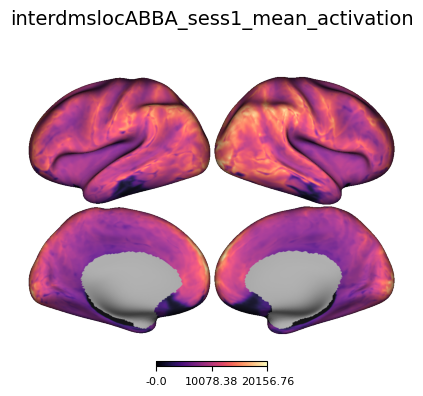

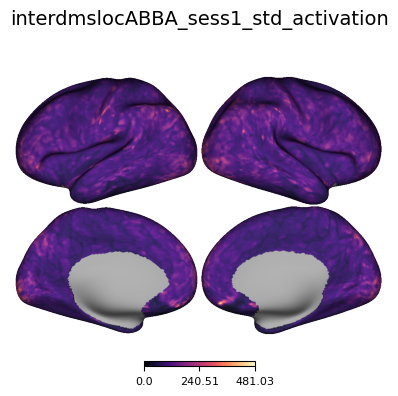

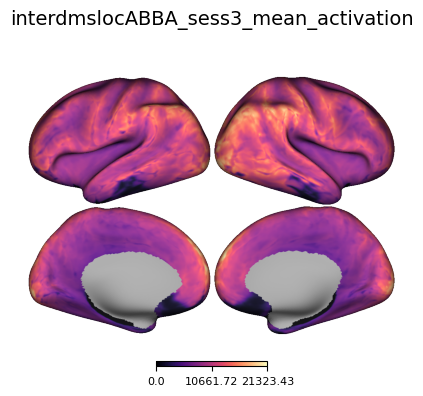

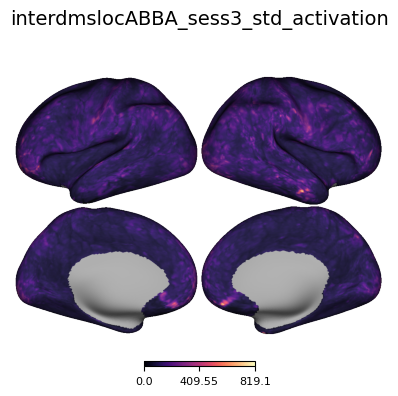

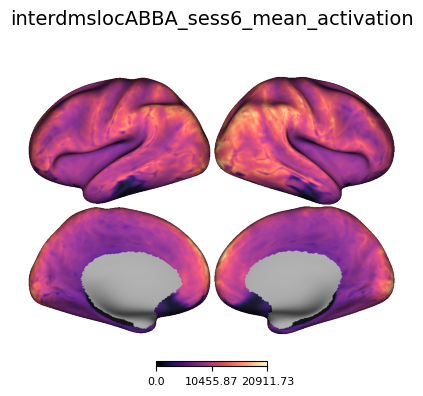

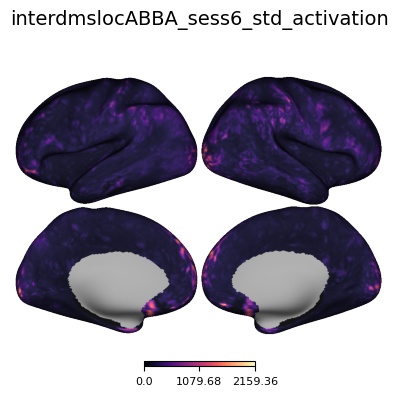

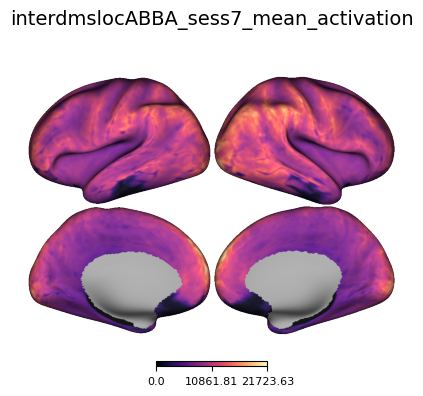

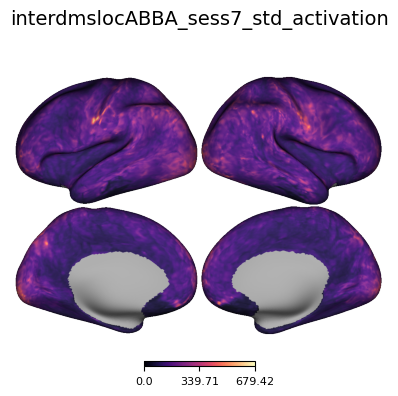

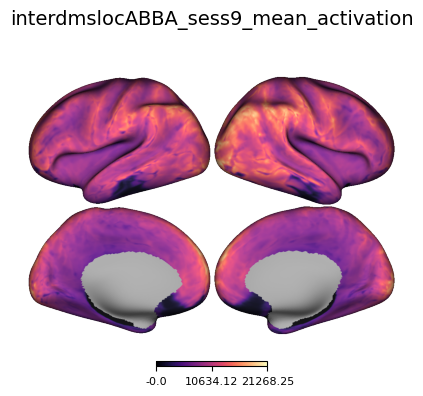

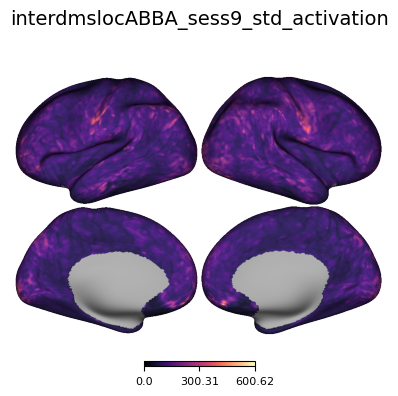

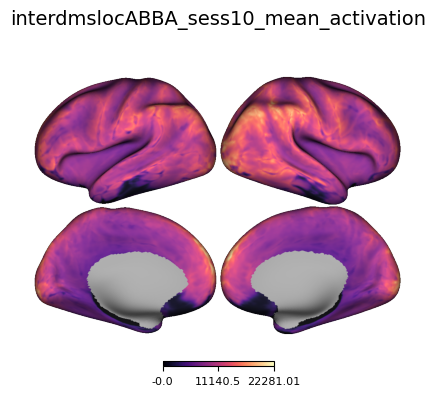

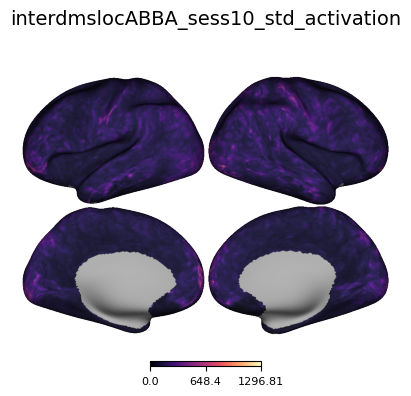

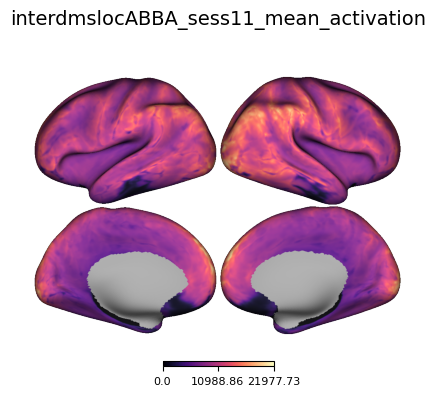

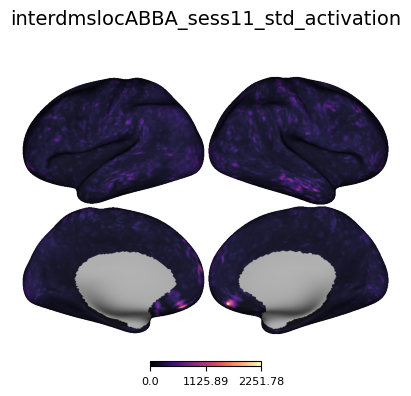

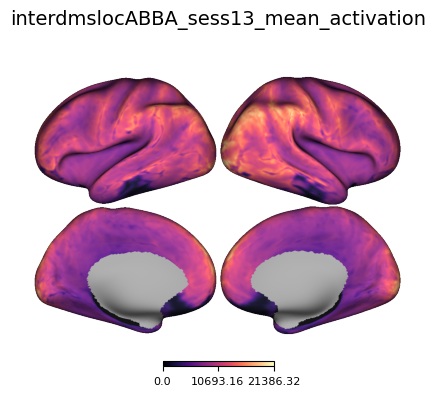

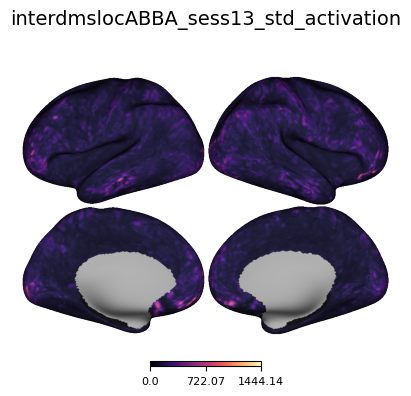

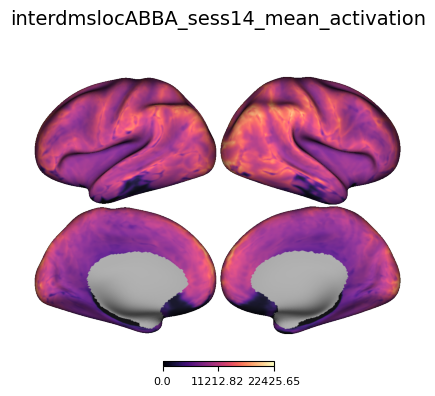

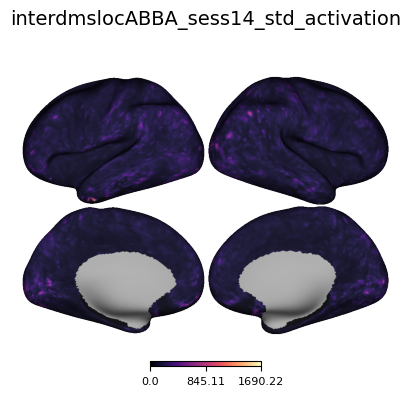

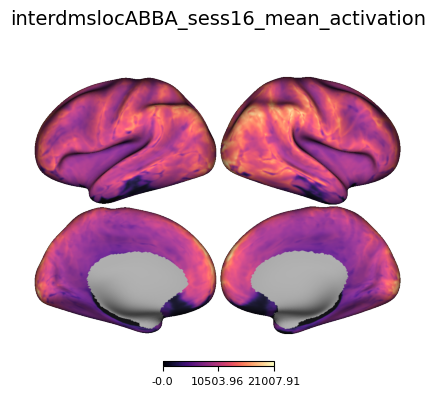

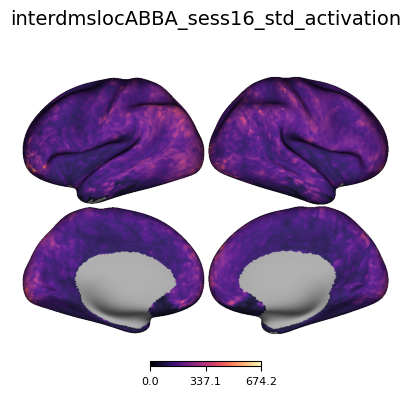

In [68]:
import matplotlib.ticker as ticker
# for each task, each session, get the average/std brain activation map
task = tasks[6]
# Regular expression to match 'run-%d' without leading zeros
pattern = re.compile(r'run-\d(?!\d)')


for ses in all_sess:
    timeseries_data_dir = os.path.join(parent_dir, subj, "activation_data", subj, f"ses-{ses:03d}", "func")
    files = os.listdir(timeseries_data_dir)
    matching_files = [file for file in files if (task in file) and not file.startswith("correct")]
    
    # Filter the files to only keep those that match the desired pattern
    matching_files = [file for file in matching_files if pattern.search(file)]
    ses_data = []
    if len(matching_files) != 0:
        for curr_file in matching_files:
            timeseries_data = nib.load(os.path.join(timeseries_data_dir, curr_file)).get_fdata() # (n_timepoints, n_voxels)
            ses_data.append(timeseries_data)
        # average over timepoints: 
        ses_data = np.concatenate(ses_data, axis = 0)
        mean_ses_data = np.mean(ses_data, axis = 0)
        std_ses_data = np.std(ses_data, axis = 0)

        # create surface plot for each session

        surfaces = fetch_fslr()
        lh, rh = surfaces['veryinflated']
        surface_dat = np.zeros((len(glasser_atlas),))
        
        for roi in range(num_regions):
            roi_ind = np.where(glasser_atlas == roi + 1)[0]
            surface_dat[roi_ind] = mean_ses_data[roi_ind]
        
        # Create the plot
        p = surfplot.Plot(lh, rh, size=(500, 350), zoom=1.8)
        p.add_layer(surface_dat.T, cmap='magma', color_range=[np.min(surface_dat), np.max(surface_dat)])
        
        # Build the figure and add a colorbar
        fig = p.build(figsize=(4, 4), colorbar=True, cbar_kws={'fontsize': 8})
        
        # Access the colorbar and format the ticks
        cbar = fig.axes[-1]  # The colorbar is usually the last axis
        cbar.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))  # Set colorbar format to 2 decimal places
        
        # Add a title
        fig.suptitle(f'{task}_sess{ses:d}_mean_activation', y=0.98, fontsize=14)
        
        # Adjust layout
        fig.tight_layout()



        # create surface plot for each session

        surfaces = fetch_fslr()
        lh, rh = surfaces['veryinflated']
        surface_dat = np.zeros((len(glasser_atlas),))
        
        for roi in range(num_regions):
            roi_ind = np.where(glasser_atlas == roi + 1)[0]
            surface_dat[roi_ind] = std_ses_data[roi_ind]
        
        # Create the plot
        p = surfplot.Plot(lh, rh, size=(500, 350), zoom=1.8)
        p.add_layer(surface_dat.T, cmap='magma', color_range=[np.min(surface_dat), np.max(surface_dat)])
        
        # Build the figure and add a colorbar
        fig = p.build(figsize=(4, 4), colorbar=True, cbar_kws={'fontsize': 8})
        
        # Access the colorbar and format the ticks
        cbar = fig.axes[-1]  # The colorbar is usually the last axis
        cbar.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))  # Set colorbar format to 2 decimal places
        
        # Add a title
        fig.suptitle(f'{task}_sess{ses:d}_std_activation', y=0.98, fontsize=14)
        
        # Adjust layout
        fig.tight_layout()


/Users/xiaoxuan/anaconda3/envs/takumri/lib/python3.10/site-packages/surfplot/plotting.py:515: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


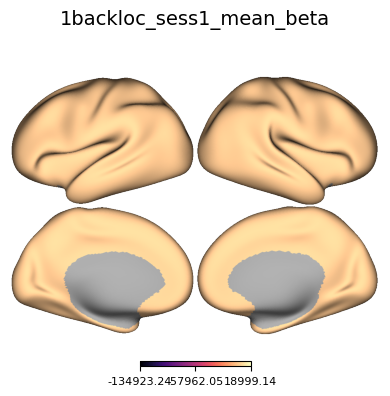

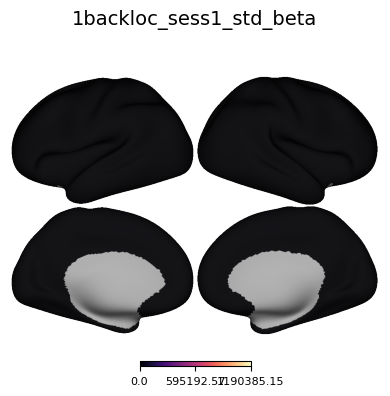

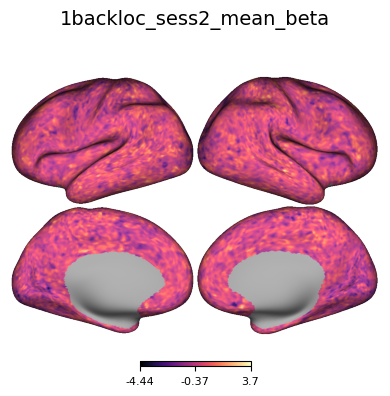

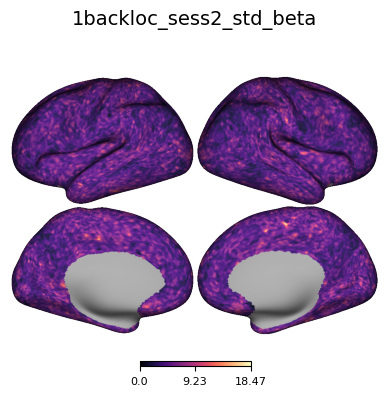

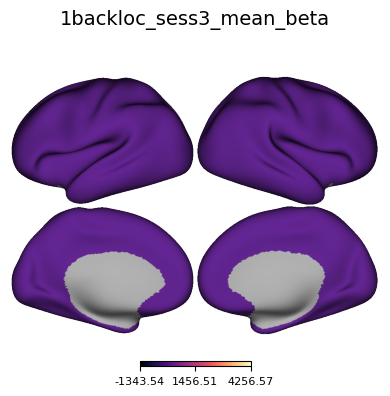

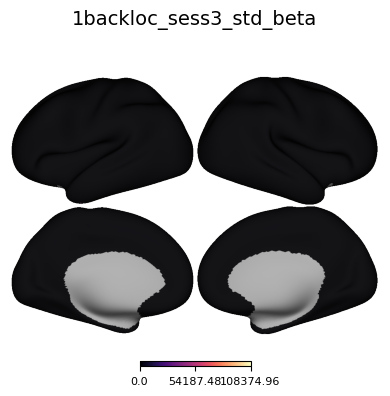

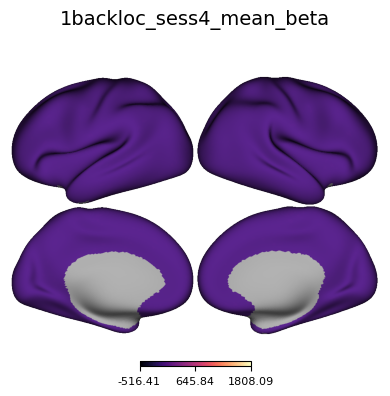

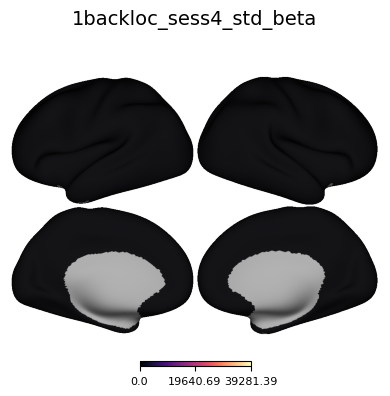

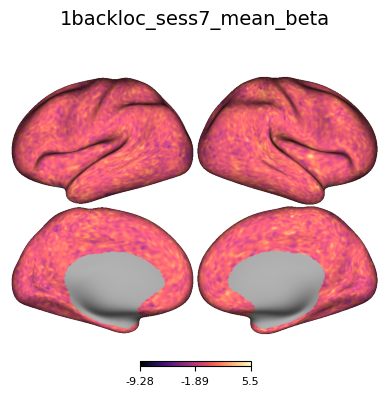

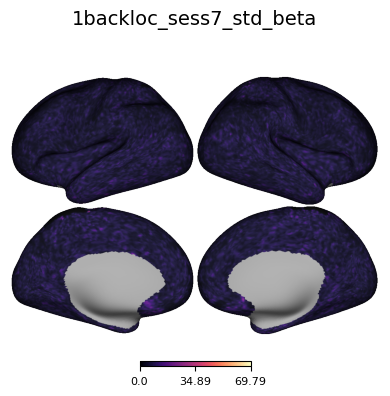

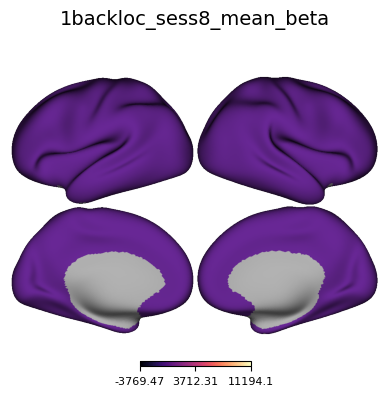

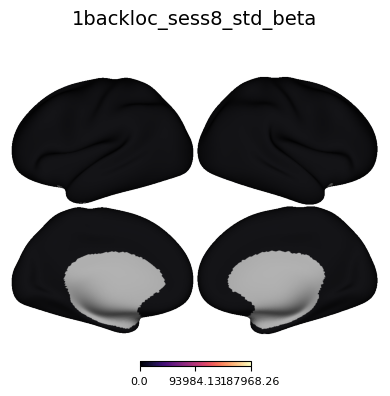

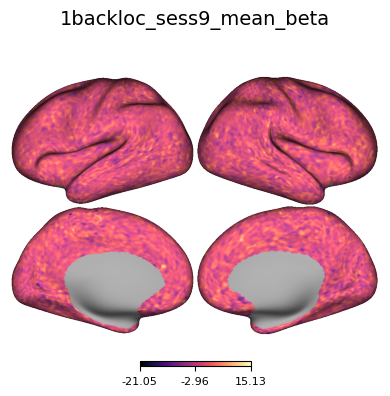

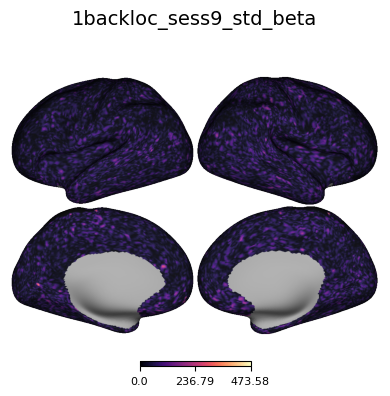

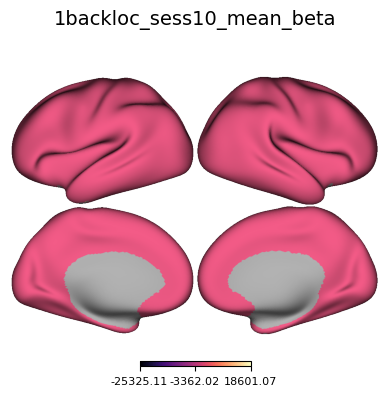

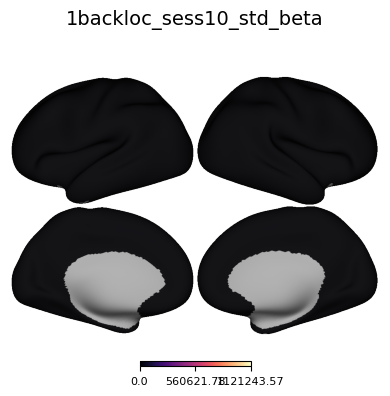

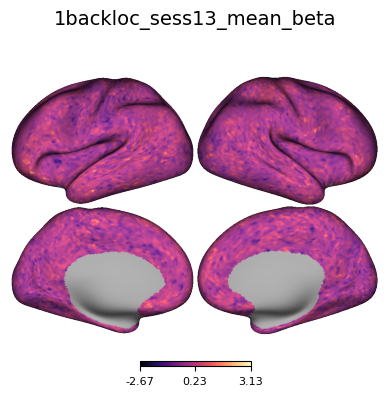

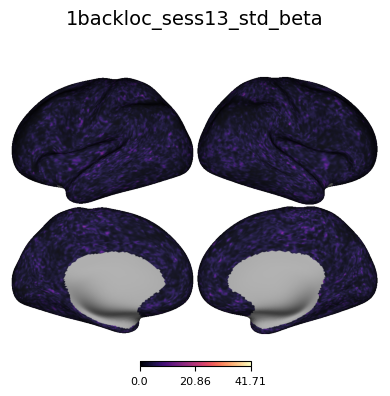

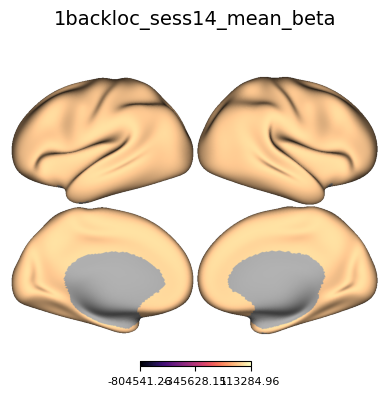

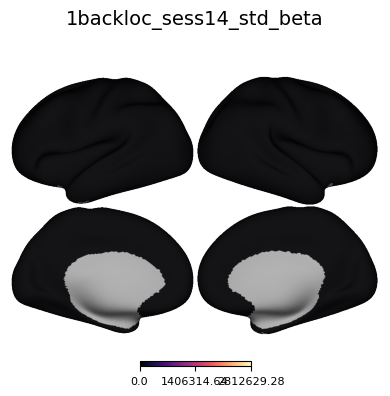

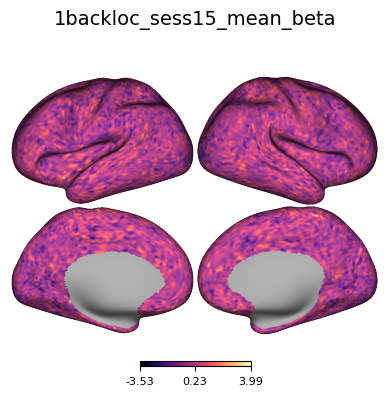

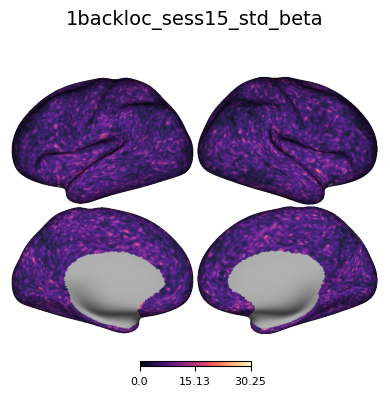

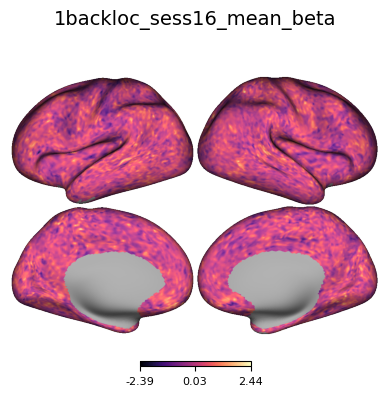

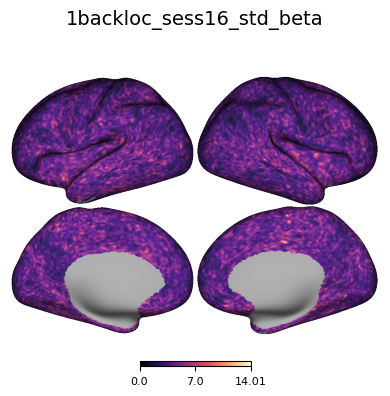

In [89]:
# surface plot of the beta data
import h5py

# without normalization
import matplotlib.ticker as ticker
# for each task, each session, get the average/std brain activation map
task = tasks[0]
# Regular expression to match 'run-%d' without leading zeros
pattern = re.compile(r'run-0\d(?!\d)')

beta_data_dir = os.path.join(parent_dir, subj, "glm_betas", subj, "glm_betas_encoding_delay_TR_betas", subj)
files = os.listdir(beta_data_dir)

for ses in all_sess:

    matching_files = [file for file in files if (task in file) and not file.startswith("correct") and ("ses%d"%ses in file) and file.startswith("normalized") and file.endswith("h5")]
    
    # Filter the files to only keep those that match the desired pattern
    matching_files = [file for file in matching_files if pattern.search(file)]
    ses_data = []
    if len(matching_files) != 0:
        for curr_file in matching_files:
            
            beta_file = h5py.File(beta_data_dir + "/" + curr_file, 'r') # (n_timepoints, n_voxels)
            beta_data = beta_file['betas'][:].copy().T
            
            ses_data.append(beta_data)
        # average over timepoints: 
        ses_data = np.concatenate(ses_data, axis = 0)
        mean_ses_data = np.mean(ses_data, axis = 0)
        std_ses_data = np.std(ses_data, axis = 0)


        # create surface plot for each session

        surfaces = fetch_fslr()
        lh, rh = surfaces['veryinflated']
        surface_dat = np.zeros((len(glasser_atlas),))
        
        for roi in range(num_regions):
            roi_ind = np.where(glasser_atlas == roi + 1)[0]
            surface_dat[roi_ind] = mean_ses_data[roi_ind]
        
        # Create the plot
        p = surfplot.Plot(lh, rh, size=(500, 350), zoom=1.8)
        p.add_layer(surface_dat.T, cmap='magma', color_range=[np.min(surface_dat), np.max(surface_dat)])
        
        # Build the figure and add a colorbar
        fig = p.build(figsize=(4, 4), colorbar=True, cbar_kws={'fontsize': 8})
        
        # Access the colorbar and format the ticks
        cbar = fig.axes[-1]  # The colorbar is usually the last axis
        cbar.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))  # Set colorbar format to 2 decimal places
        
        # Add a title
        fig.suptitle(f'{task}_sess{ses:d}_mean_beta', y=0.98, fontsize=14)
        
        # Adjust layout
        fig.tight_layout()



        # create surface plot for each session

        surfaces = fetch_fslr()
        lh, rh = surfaces['veryinflated']
        surface_dat = np.zeros((len(glasser_atlas),))
        
        for roi in range(num_regions):
            roi_ind = np.where(glasser_atlas == roi + 1)[0]
            surface_dat[roi_ind] = std_ses_data[roi_ind]
        
        # Create the plot
        p = surfplot.Plot(lh, rh, size=(500, 350), zoom=1.8)
        p.add_layer(surface_dat.T, cmap='magma', color_range=[np.min(surface_dat), np.max(surface_dat)])
        
        # Build the figure and add a colorbar
        fig = p.build(figsize=(4, 4), colorbar=True, cbar_kws={'fontsize': 8})
        
        # Access the colorbar and format the ticks
        cbar = fig.axes[-1]  # The colorbar is usually the last axis
        cbar.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))  # Set colorbar format to 2 decimal places
        
        # Add a title
        fig.suptitle(f'{task}_sess{ses:d}_std_beta', y=0.98, fontsize=14)
        
        # Adjust layout
        fig.tight_layout()

        

In [40]:
np.sum(np.where(mean_ses_data.reshape(-1)==0))/mean_ses_data.reshape(-1).shape[0]

2359.876892773606

In [57]:
data = 

In [70]:
len(np.where(ses_data.reshape(-1) == 0)[0])/len(timeseries_data.reshape(-1))

0.08574418318355287

In [71]:
len(np.where(mean_ses_data.reshape(-1) == 0)[0])/len(mean_ses_data.reshape(-1))

0.08574418318355287

In [72]:
len(np.where(std_ses_data.reshape(-1) == 0)[0])/len(std_ses_data.reshape(-1))

0.09797796380647544

## task-wise correlation in the activation space

In [9]:
# for randomly sampled half sessions, calculate taskwise RSM matrix

def cosine_similarity_vector(a, b):
    # use sentence_transformer definition of cosine similarity
    # cosine_similarity = util.cos_sim(a, b)

    # naive definition of cosine similarity
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    
    cosine_similarity = np.dot(a, b) / (norm_a * norm_b)
    return cosine_similarity

import re
def within_half_sessions_taskwise_cosine_similarity(task_activations,  method = "cosine", selected_session_indices = None ):
    # input: task_activationss: dictionary of data containing for each task, each session, each run of the activation value
    # for each task (except for 1back ctg and 1back obj), for all sessions, randomly sample half of the sessions
    # calculate task-wise RSA matrix

    # reorganize task_activations
    data = []

    if selected_session_indices is None:
        for task in task_activations.keys():
            n_session = len(task_activations[task].keys())
            print("n_session:", n_session)
            break
        # split half session all combination numbers
        n_selected_session = 8
        # Generate all possible combinations of half of the session numbers
        combinations = list(itertools.combinations(list(range(1, n_session+1)), n_selected_session))
        print(len(combinations))
        # sample half of the session index
        selected_combo_index = random.randint(0, len(combinations))
        print(selected_combo_index)
        selected_session_indices = combinations[selected_combo_index]

    # Iterate through the original dictionary
    for task in task_activations.keys():
        
        if task == "1backctg" or task == "1backobj": continue
        concatenated_data = []
        for session in task_activations[task].keys():
            if int(session)  not in selected_session_indices:
                continue
            if len(task_activations[task][session]) != 0: 
                concatenated_data.append(task_activations[task][session])
            
              
        data.append(np.concatenate(concatenated_data, axis = 0))
    
    # Initialize matrices to store RSM
    rsm_matrix = np.zeros((len(data), len(data)))
   

    # Calculate RSM for each pair of tasks
    for i in range(len(data)):
        for j in range(len(data)):
            vector_a  = np.mean(data[i], axis = 0)
            vector_b = np.mean(data[j], axis = 0)
            if method == "cosine":
                # Compute RSM (cosine similarity in this case)
                rsm_matrix[i,j] = cosine_similarity_vector(vector_a, vector_b)
        
    
    return rsm_matrix, selected_session_indices
    


In [7]:
import matplotlib.ticker as ticker
# for each task, each session, get the average/std brain activation map

# Regular expression to match 'run-%d' without leading zeros
pattern = re.compile(r'run-\d(?!\d)')

task_activations = {}
for task in tasks:
    print(task)
    task_activations[task] = {}
    for ses in all_sess[:13]:
        print("ses:", ses)
        task_activations[task][ses] = []
        
        timeseries_data_dir = os.path.join(parent_dir, subj, "activation_data", subj, f"ses-{ses:03d}", "func")
        
        files = os.listdir(timeseries_data_dir)
        matching_files = [file for file in files if (task in file) and not file.startswith("correct")]
        
        # Filter the files to only keep those that match the desired pattern
        matching_files = [file for file in matching_files if pattern.search(file)]
        ses_data = []
        if len(matching_files) != 0:
            for curr_file in matching_files:
                
                timeseries_data = nib.load(os.path.join(timeseries_data_dir, curr_file)).get_fdata() # (n_timepoints, n_voxels)
                ses_data.append(np.mean(timeseries_data, axis = 0))
                del timeseries_data
                print(4)
            task_activations[task][ses] = np.concatenate(ses_data, axis = 0)


1backloc
ses: 1
4
ses: 2
4
ses: 3
4
ses: 4
4
ses: 5
ses: 6
ses: 7
4
ses: 8
4
ses: 9
4
ses: 10
4
ses: 11
ses: 12
ses: 13
4
1backctg
ses: 1
ses: 2
ses: 3
ses: 4
ses: 5
4
ses: 6
ses: 7
ses: 8
ses: 9
ses: 10
ses: 11
4
ses: 12
ses: 13
1backobj
ses: 1
ses: 2
ses: 3
ses: 4
ses: 5
ses: 6
4
ses: 7
ses: 8
ses: 9
ses: 10
ses: 11
ses: 12
4
ses: 13
ctxlco
ses: 1
4
ses: 2
4
4
ses: 3
4
ses: 4
4
4
ses: 5
4
4
ses: 6
ses: 7
ses: 8
ses: 9
4
ses: 10
4
ses: 11
4
4
ses: 12
ses: 13
4
ctxcol
ses: 1
4
ses: 2
ses: 3
4
ses: 4
ses: 5
ses: 6
4
4
ses: 7
4
4
ses: 8
4
4
ses: 9
4
ses: 10
4
ses: 11
ses: 12
4
4
ses: 13
4
interdmsobjABAB
ses: 1
4
ses: 2
ses: 3
4
ses: 4
4
ses: 5
ses: 6
ses: 7
ses: 8
ses: 9
4
ses: 10
4
ses: 11
ses: 12
ses: 13
interdmslocABBA
ses: 1
4
ses: 2
ses: 3
4
ses: 4
ses: 5
ses: 6
4
4
ses: 7
4
ses: 8
ses: 9
4
ses: 10
4
ses: 11
4
4
ses: 12
ses: 13
4
4
interdmslocABAB
ses: 1
ses: 2
4
4
ses: 3
ses: 4
4
ses: 5
4
ses: 6
4
ses: 7
4
ses: 8
4
ses: 9
ses: 10
4
ses: 11
4
ses: 12
4
ses: 13
interdmsctgABAB
ses: 

KeyboardInterrupt: 

In [10]:
import random
selected_session_indices = None
rsm_matrix, selected_session_indices = within_half_sessions_taskwise_cosine_similarity(task_activations,  method = "cosine", selected_session_indices = selected_session_indices)

n_session: 13
1287
831


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


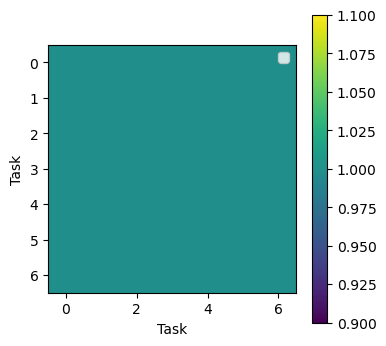

In [12]:
import matplotlib.pyplot as plt
# Plotting the heatmap of the rsm matrices
plt.figure(figsize=(4, 4))

# Plot the distribution of rsm_matrix
# plt.hist(rsm_matrix, bins=30, alpha=0.5, label='RSM Matrix', color='blue')
plt.imshow(rsm_matrix)
plt.colorbar()


# Adding title and labels
# plt.title('Task %s: Distribution of RSM Matrix and RSM Std Matrix' % task)
plt.xlabel('Task')
plt.ylabel('Task')

# Adding a legend
plt.legend()

# Show the plot
plt.show()